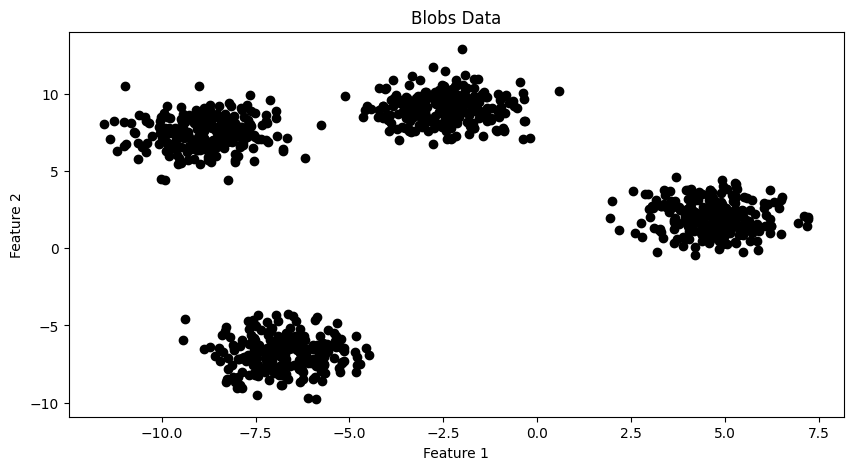

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# Visualise Core Data
plt.figure(figsize=(10, 5))

plt.scatter(X[:, 0], X[:, 1], c='black')
plt.title('Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [21]:
import pandas as pd

# Assuming X is your blob data
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
print(df.head())


   Feature 1  Feature 2
0  -8.555040   7.064618
1  -6.137532  -6.580817
2  -6.321300  -6.804104
3   4.180518   1.123325
4   4.380287   0.470027


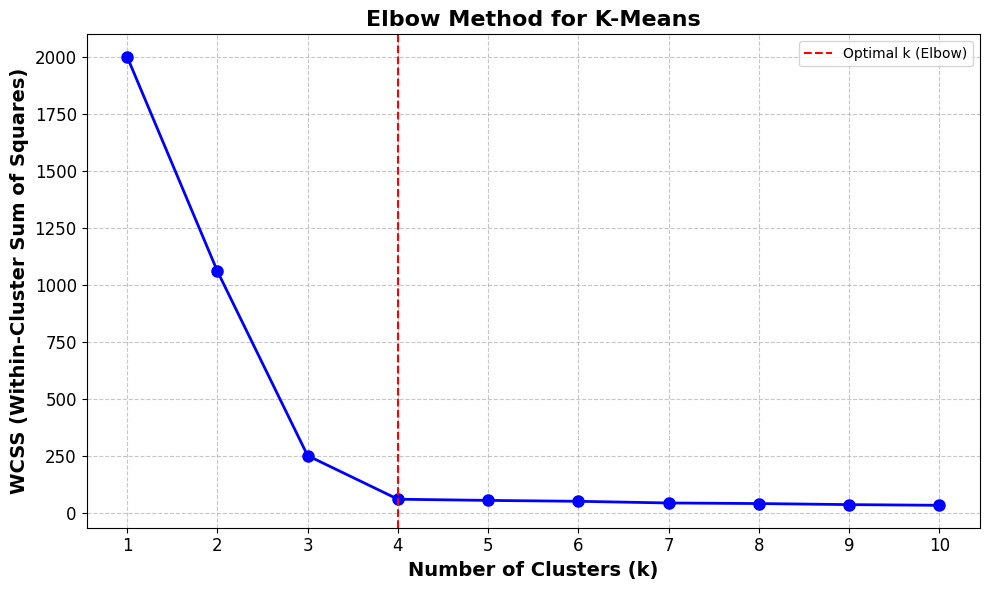

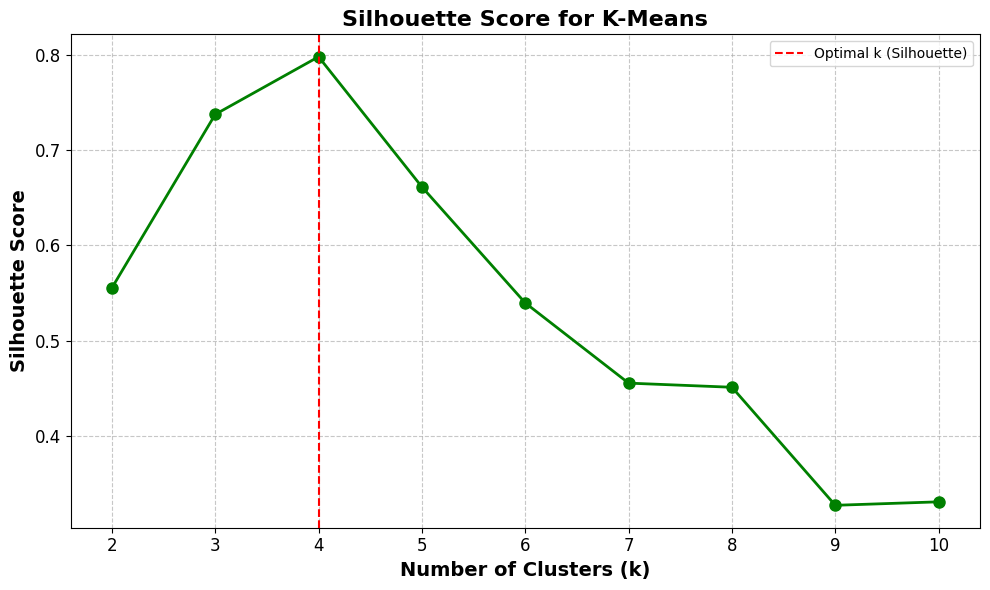

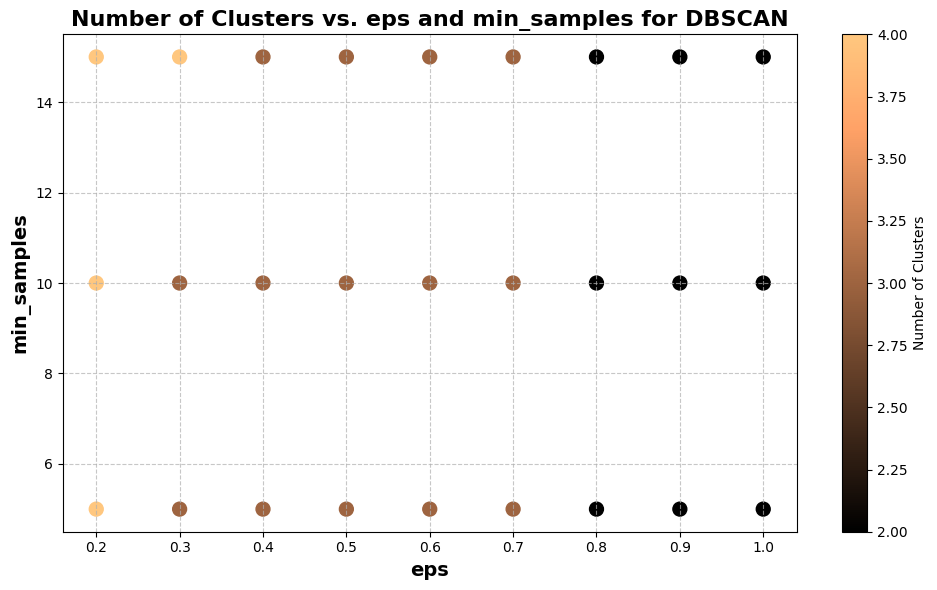

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Generate synthetic data (If X is not already defined)
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# Standardise features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # This line creates the X_scaled variable

# Elbow Method for K-Means
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b', linestyle='-',
         linewidth=2, markersize=8)
plt.title('Elbow Method for K-Means', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14,
           fontweight='bold')
plt.xticks(range(1, 11), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Drawing a dashed line at the elbow (optimal k = 4)
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k (Elbow)')

plt.legend()
plt.tight_layout()
plt.show()

# Silhouette Score for K-Means
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, y_kmeans)
    sil_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='g', linestyle='-',
         linewidth=2, markersize=8)
plt.title('Silhouette Score for K-Means', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=14, fontweight='bold')
plt.xticks(range(2, 11), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Draw a dashed line at the highest Silhouette score (optimal k = 4)
optimal_k_silhouette = range(2, 11)[sil_scores.index(max(sil_scores))]
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--',
            label='Optimal k (Silhouette)')

plt.legend()  # Show the legend for the dashed line
plt.tight_layout()
plt.show()


# Elbow Method for DBSCAN
eps_values = np.arange(0.2, 1.1, 0.1)  # Varying epsilon (eps) values
min_samples_values = [5, 10, 15]  # Different values for min_samples
num_clusters = []

# Compute the number of clusters for different eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        # Count the number of clusters (excluding noise points -1)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_clusters.append((eps, min_samples, n_clusters))

# Plot the number of clusters vs. eps and min_samples
eps_vals, min_samples_vals, cluster_counts = zip(*num_clusters)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(eps_vals, min_samples_vals, c=cluster_counts,
                      cmap='copper', s=100)
plt.title('Number of Clusters vs. eps and min_samples for DBSCAN',
          fontsize=16, fontweight='bold')
plt.xlabel('eps', fontsize=14, fontweight='bold')
plt.ylabel('min_samples', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Number of Clusters')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


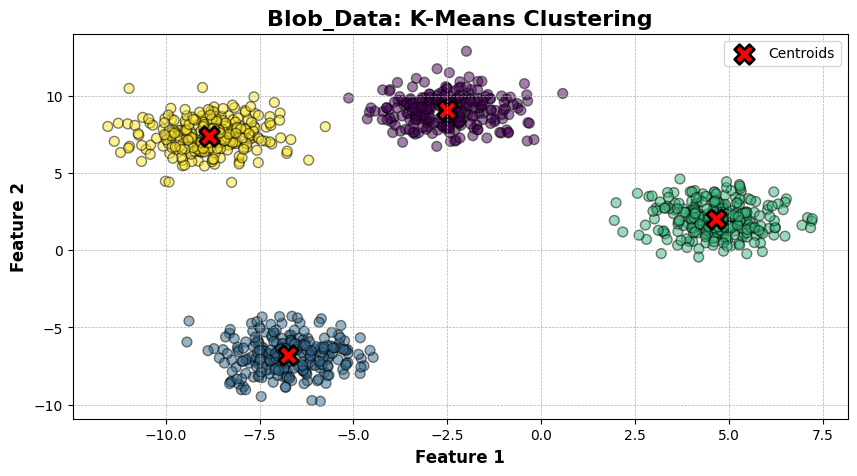

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Centroids of the clusters
centroids = kmeans.cluster_centers_

# Visualise K-Means clustering
plt.figure(figsize=(10, 5))

# Scatter plot of the data points with cluster labels
scatter = plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis',
                      alpha=0.5, edgecolors='k', s=50)

# Plot centroids with red 'X' markers and outline
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200,
            label='Centroids', edgecolors='black', linewidths=2)

# Add title and labels with bold fonts
plt.title('Blob_Data: K-Means Clustering', fontsize=16, weight='bold')
plt.xlabel('Feature 1', fontsize=12, weight='bold')
plt.ylabel('Feature 2', fontsize=12, weight='bold')

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend()

# Show the plot
plt.show()


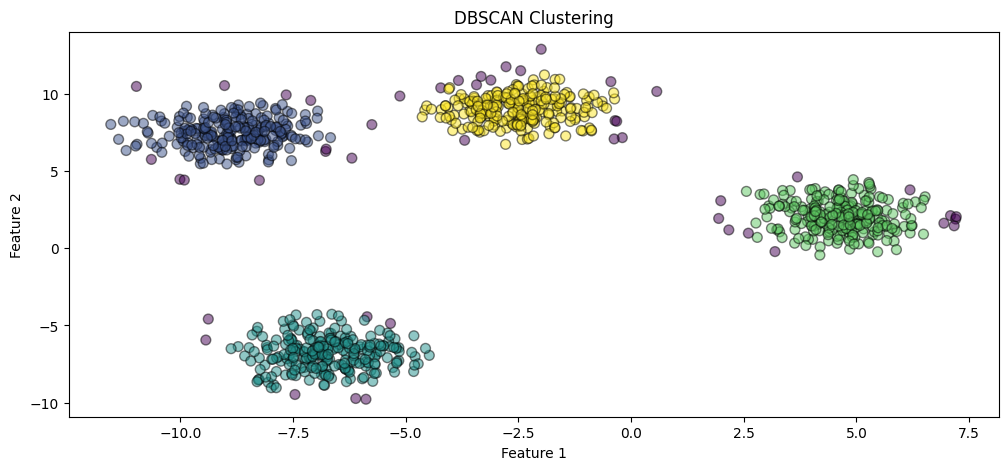

In [24]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan_labels = dbscan.fit_predict(X)

# Visualise DBSCAN clustering
plt.figure(figsize=(12, 5))

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5,
            edgecolors='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

<ipython-input-25-1f56bebecc77>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [],


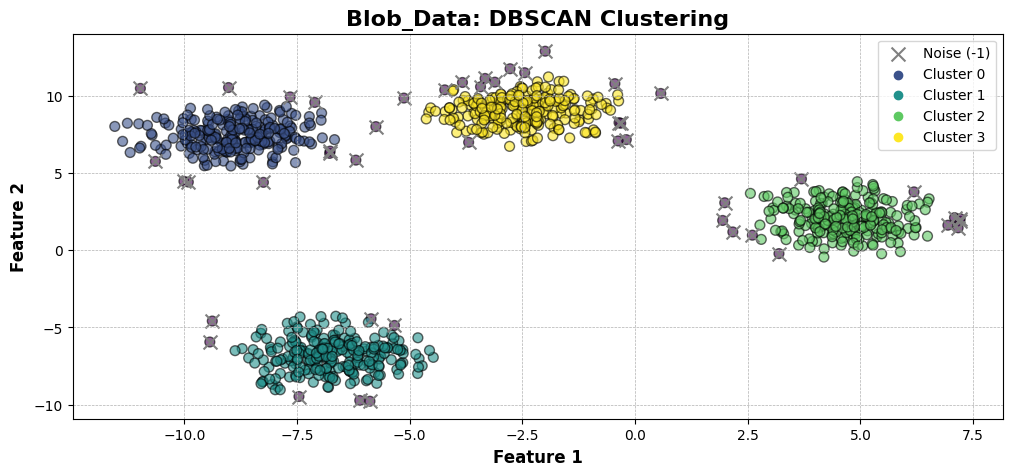

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan_labels = dbscan.fit_predict(X)

# Visualise DBSCAN clustering
plt.figure(figsize=(12, 5))

# Scatter plot of the data points with cluster labels
# Noise points (-1) will be plotted in gray
scatter = plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis',
                      alpha=0.6, marker='o', edgecolors='k', s=50)

# Highlight noise points (dbscan labels == -1) in a different colour (gray)
plt.scatter(X[dbscan_labels == -1, 0], X[dbscan_labels == -1, 1], c='gray',
            marker='x', label='Noise (-1)', s=100)

# Add title and labels with bold fonts
plt.title('Blob_Data: DBSCAN Clustering', fontsize=16, weight='bold')
plt.xlabel('Feature 1', fontsize=12, weight='bold')
plt.ylabel('Feature 2', fontsize=12, weight='bold')

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend for clusters and noise

unique_labels = set(dbscan_labels)
for label in unique_labels:
    if label != -1:

        plt.scatter([], [],
                    c=plt.cm.viridis((label + 1) / (max(unique_labels) + 1)),
                    label=f'Cluster {label}')

# Add the legend to the plot
plt.legend()

# Show the plot
plt.show()


In [26]:
# Check how many clusters and noise points are detected
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
# Exclude noise (-1) from clusters count
num_noise_points = list(dbscan_labels).count(-1)
# Count the number of noise points (-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points (label = -1): {num_noise_points}")


Number of clusters: 4
Number of noise points (label = -1): 47


In [27]:
import pandas as pd

# Load the Wholesale Customers dataset
data = pd.read_csv('/content/Wholesale customers data.csv')

# Check the first few rows of the dataset
data.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


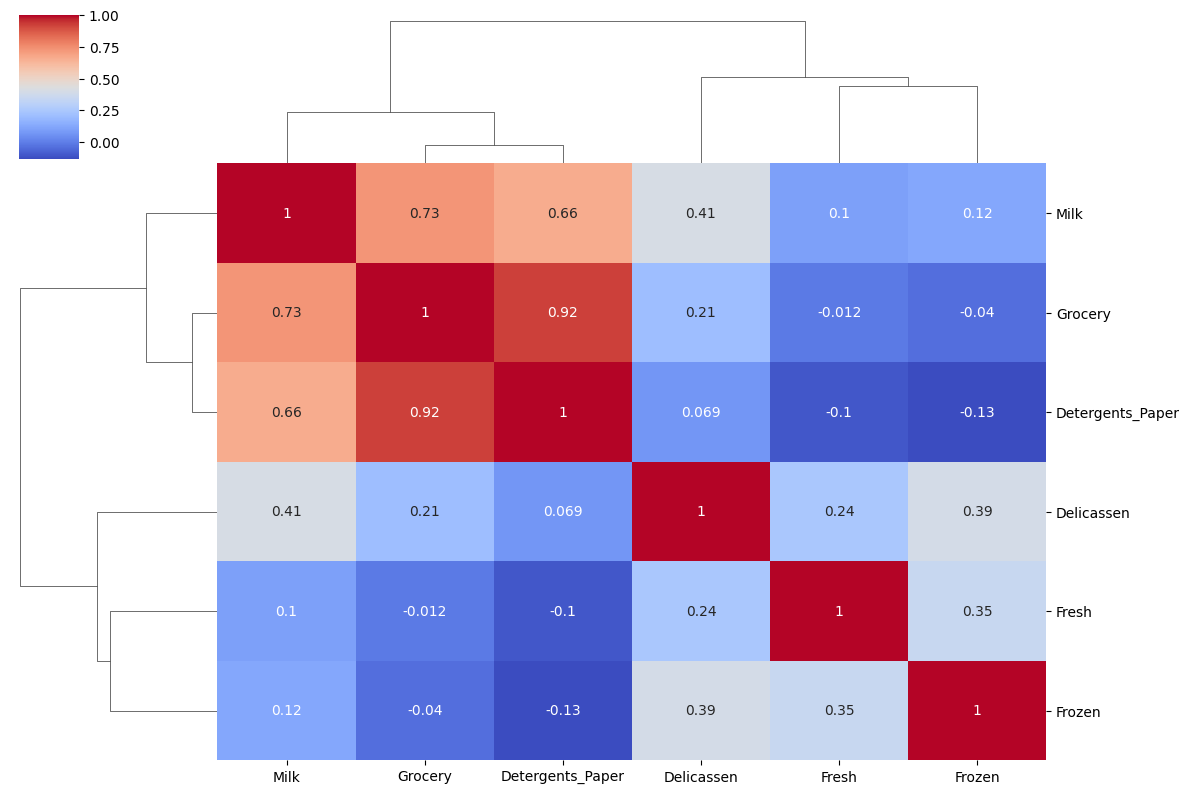

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Wholesale Customers dataset
data = pd.read_csv('/content/Wholesale customers data.csv')

# Extract numerical features (drop the 'Channel' and 'Region' columns)
df = data.drop(['Channel', 'Region'], axis=1)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create the clustermap, starting from the 3rd row and 3rd column (to skip 'Channel' and 'Region')
sns.clustermap(corr_matrix, annot=True, figsize=(12, 8), cmap='coolwarm')

# Display the plot
plt.show()

df.head()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


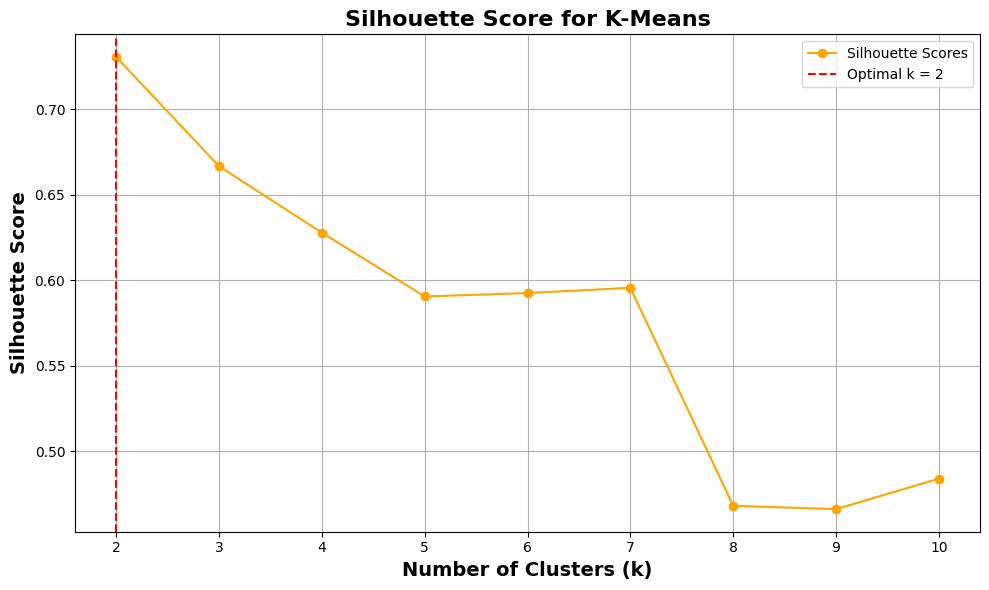

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Use only the 'Grocery' and 'Detergents_Paper' features
X = df[['Grocery', 'Detergents_Paper']]

# Standardise the features (important for both K-Means and DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Silhouette Score for K-Means
sil_scores_kmeans = []
for k in range(2, 11):  # Silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, y_kmeans)
    sil_scores_kmeans.append(score)

# Find the optimal number of clusters
best_k = np.argmax(sil_scores_kmeans) + 2

# Plot the Silhouette Scores for K-Means
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores_kmeans, marker='o', color='orange',
         label='Silhouette Scores')
plt.axvline(x=best_k, color='r', linestyle='--',
            label=f'Optimal k = {best_k}')  # Red dashed line

# Add title, labels, and grid
plt.title('Silhouette Score for K-Means', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=14, fontweight='bold')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


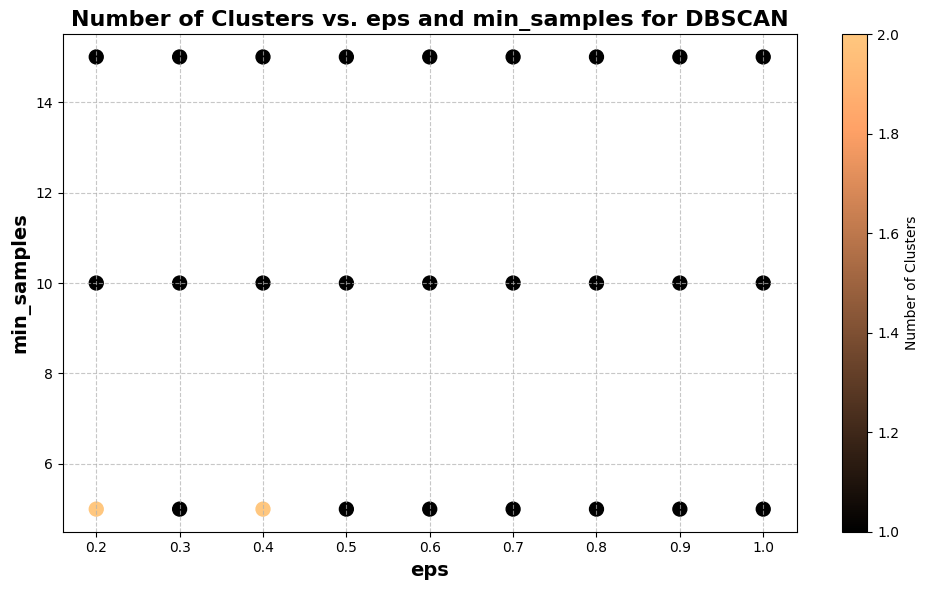

In [31]:
# Elbow Method for DBSCAN
eps_values = np.arange(0.2, 1.1, 0.1)  # Varying epsilon (eps) values
min_samples_values = [5, 10, 15]  # Different values for min_samples
num_clusters = []

# Compute the number of clusters for different eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Count the number of clusters (excluding noise points -1)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

      # Append the values for eps, min_samples, and the number of clusters found
        num_clusters.append((eps, min_samples, n_clusters))

# Extract the eps, min_samples, and number of clusters into separate variables
eps_vals, min_samples_vals, cluster_counts = zip(*num_clusters)

# Plot the number of clusters vs. eps and min_samples
plt.figure(figsize=(10, 6))
scatter = plt.scatter(eps_vals, min_samples_vals, c=cluster_counts,
                      cmap='copper', s=100)

# Title and labels
plt.title('Number of Clusters vs. eps and min_samples for DBSCAN',
          fontsize=16, fontweight='bold')
plt.xlabel('eps', fontsize=14, fontweight='bold')
plt.ylabel('min_samples', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Number of Clusters')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
# Apply K-Means with 2 clusters based on Silhouette Score
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Check how many clusters are detected
n_clusters_kmeans = len(set(y_kmeans))

print(f"Number of clusters detected (K-Means): {n_clusters_kmeans}")


Number of clusters detected (K-Means): 2


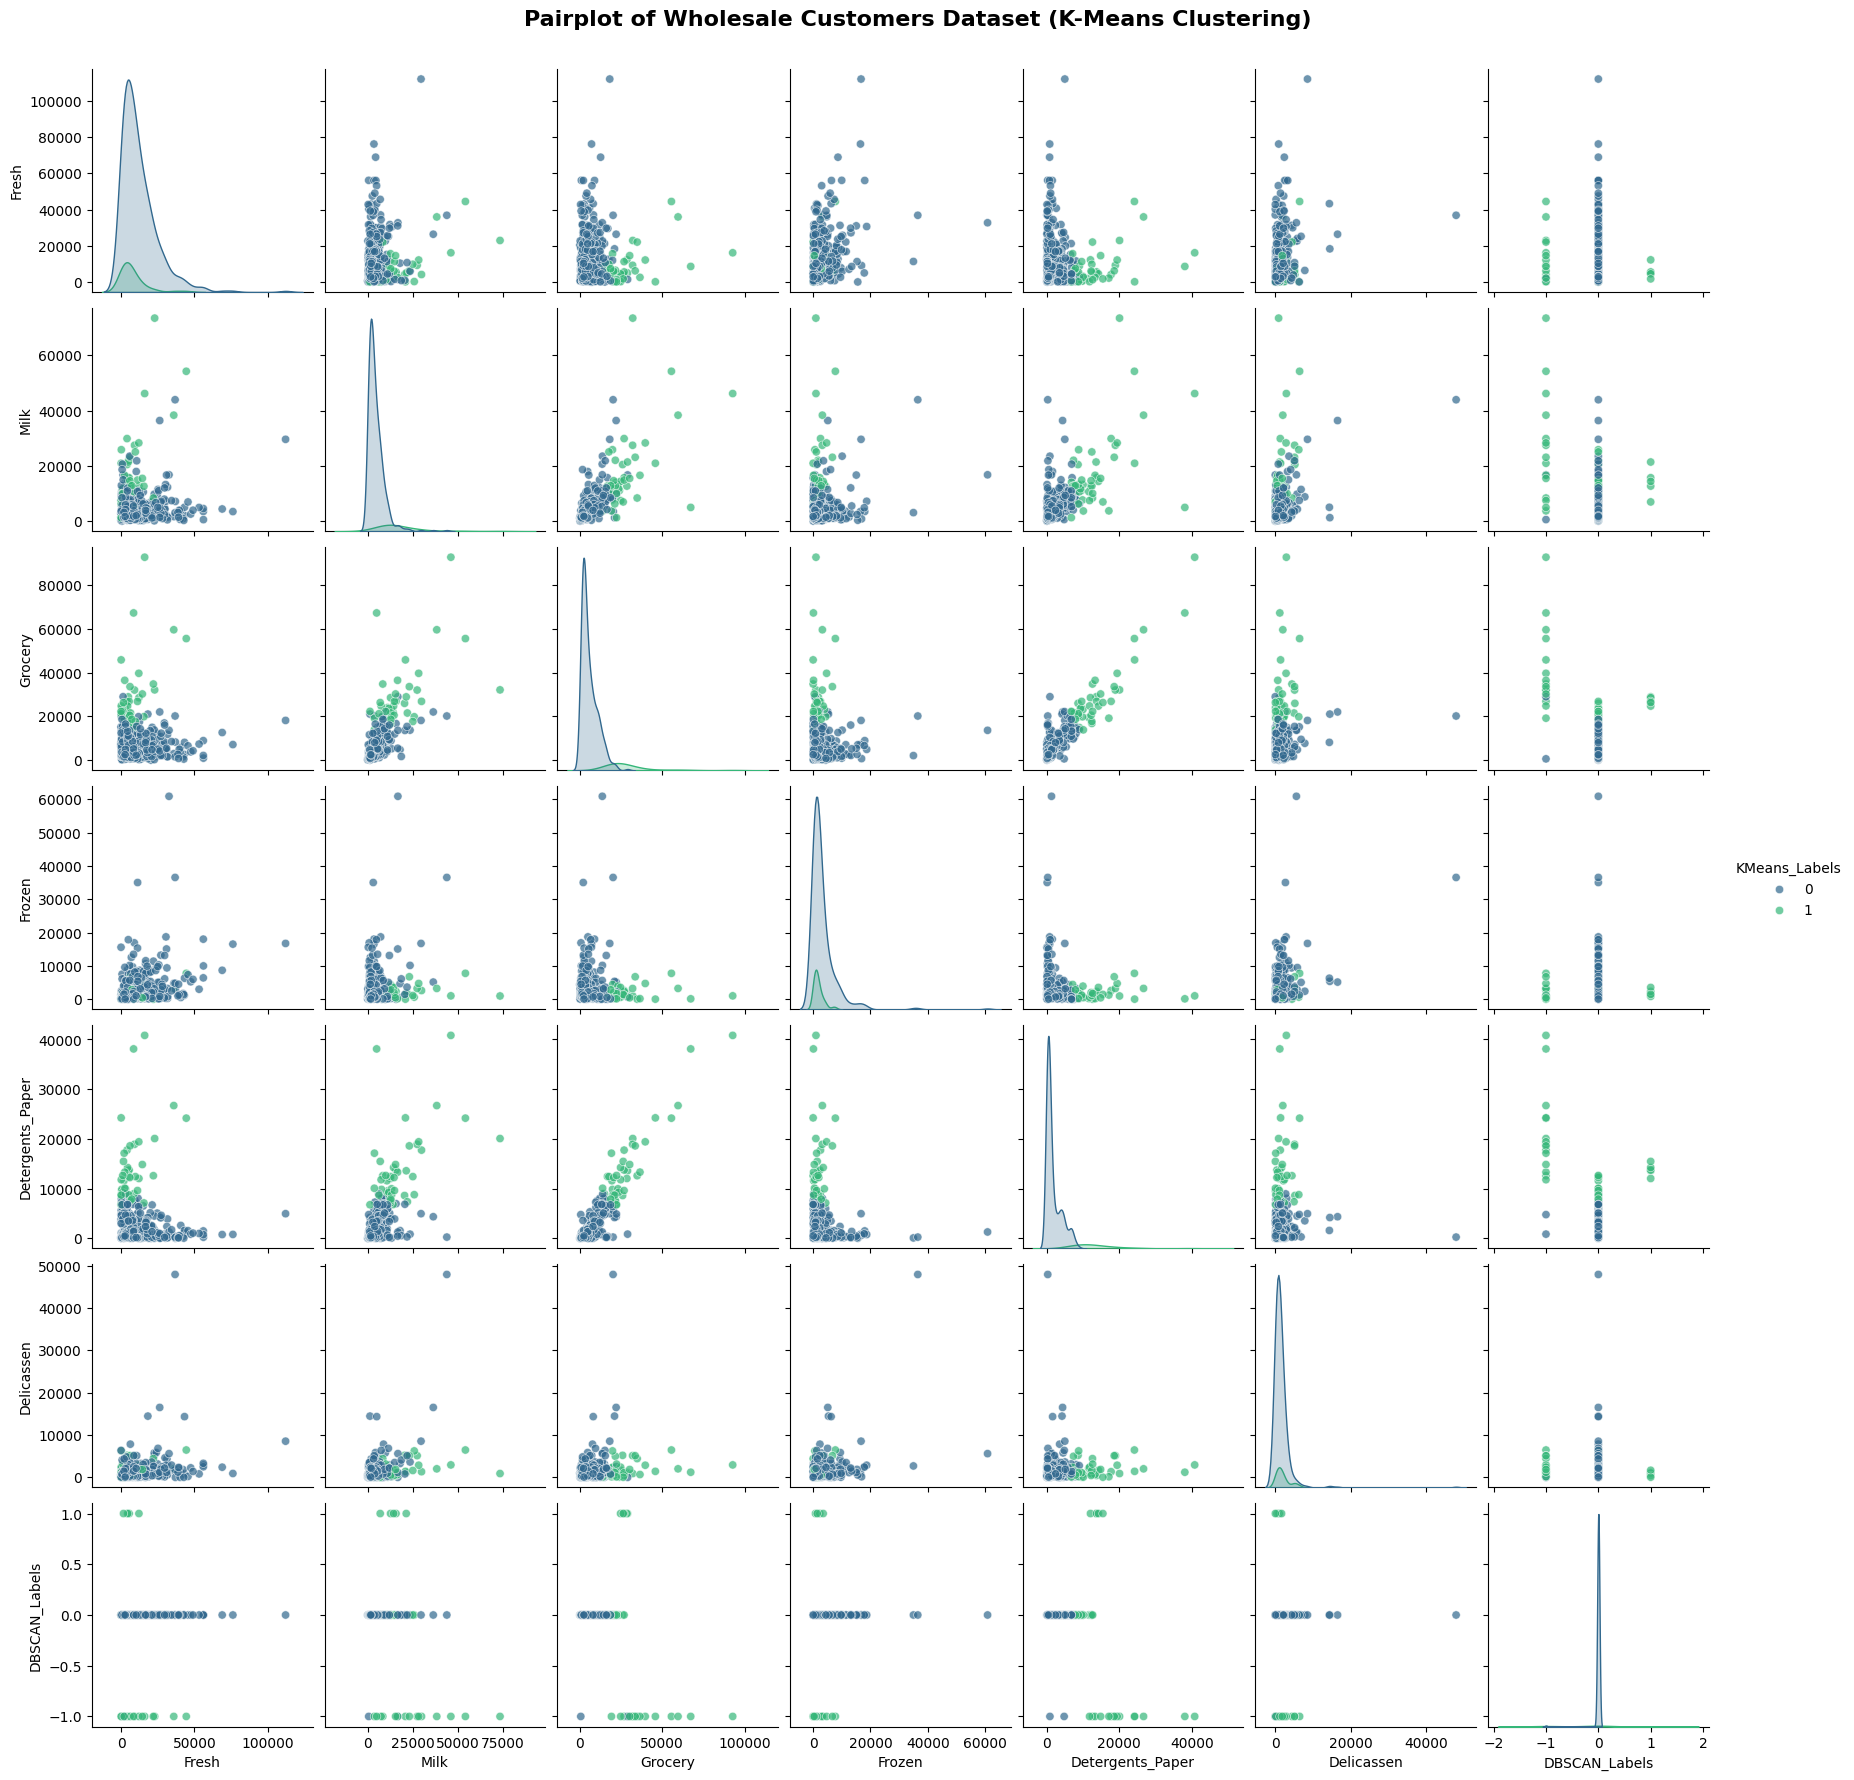

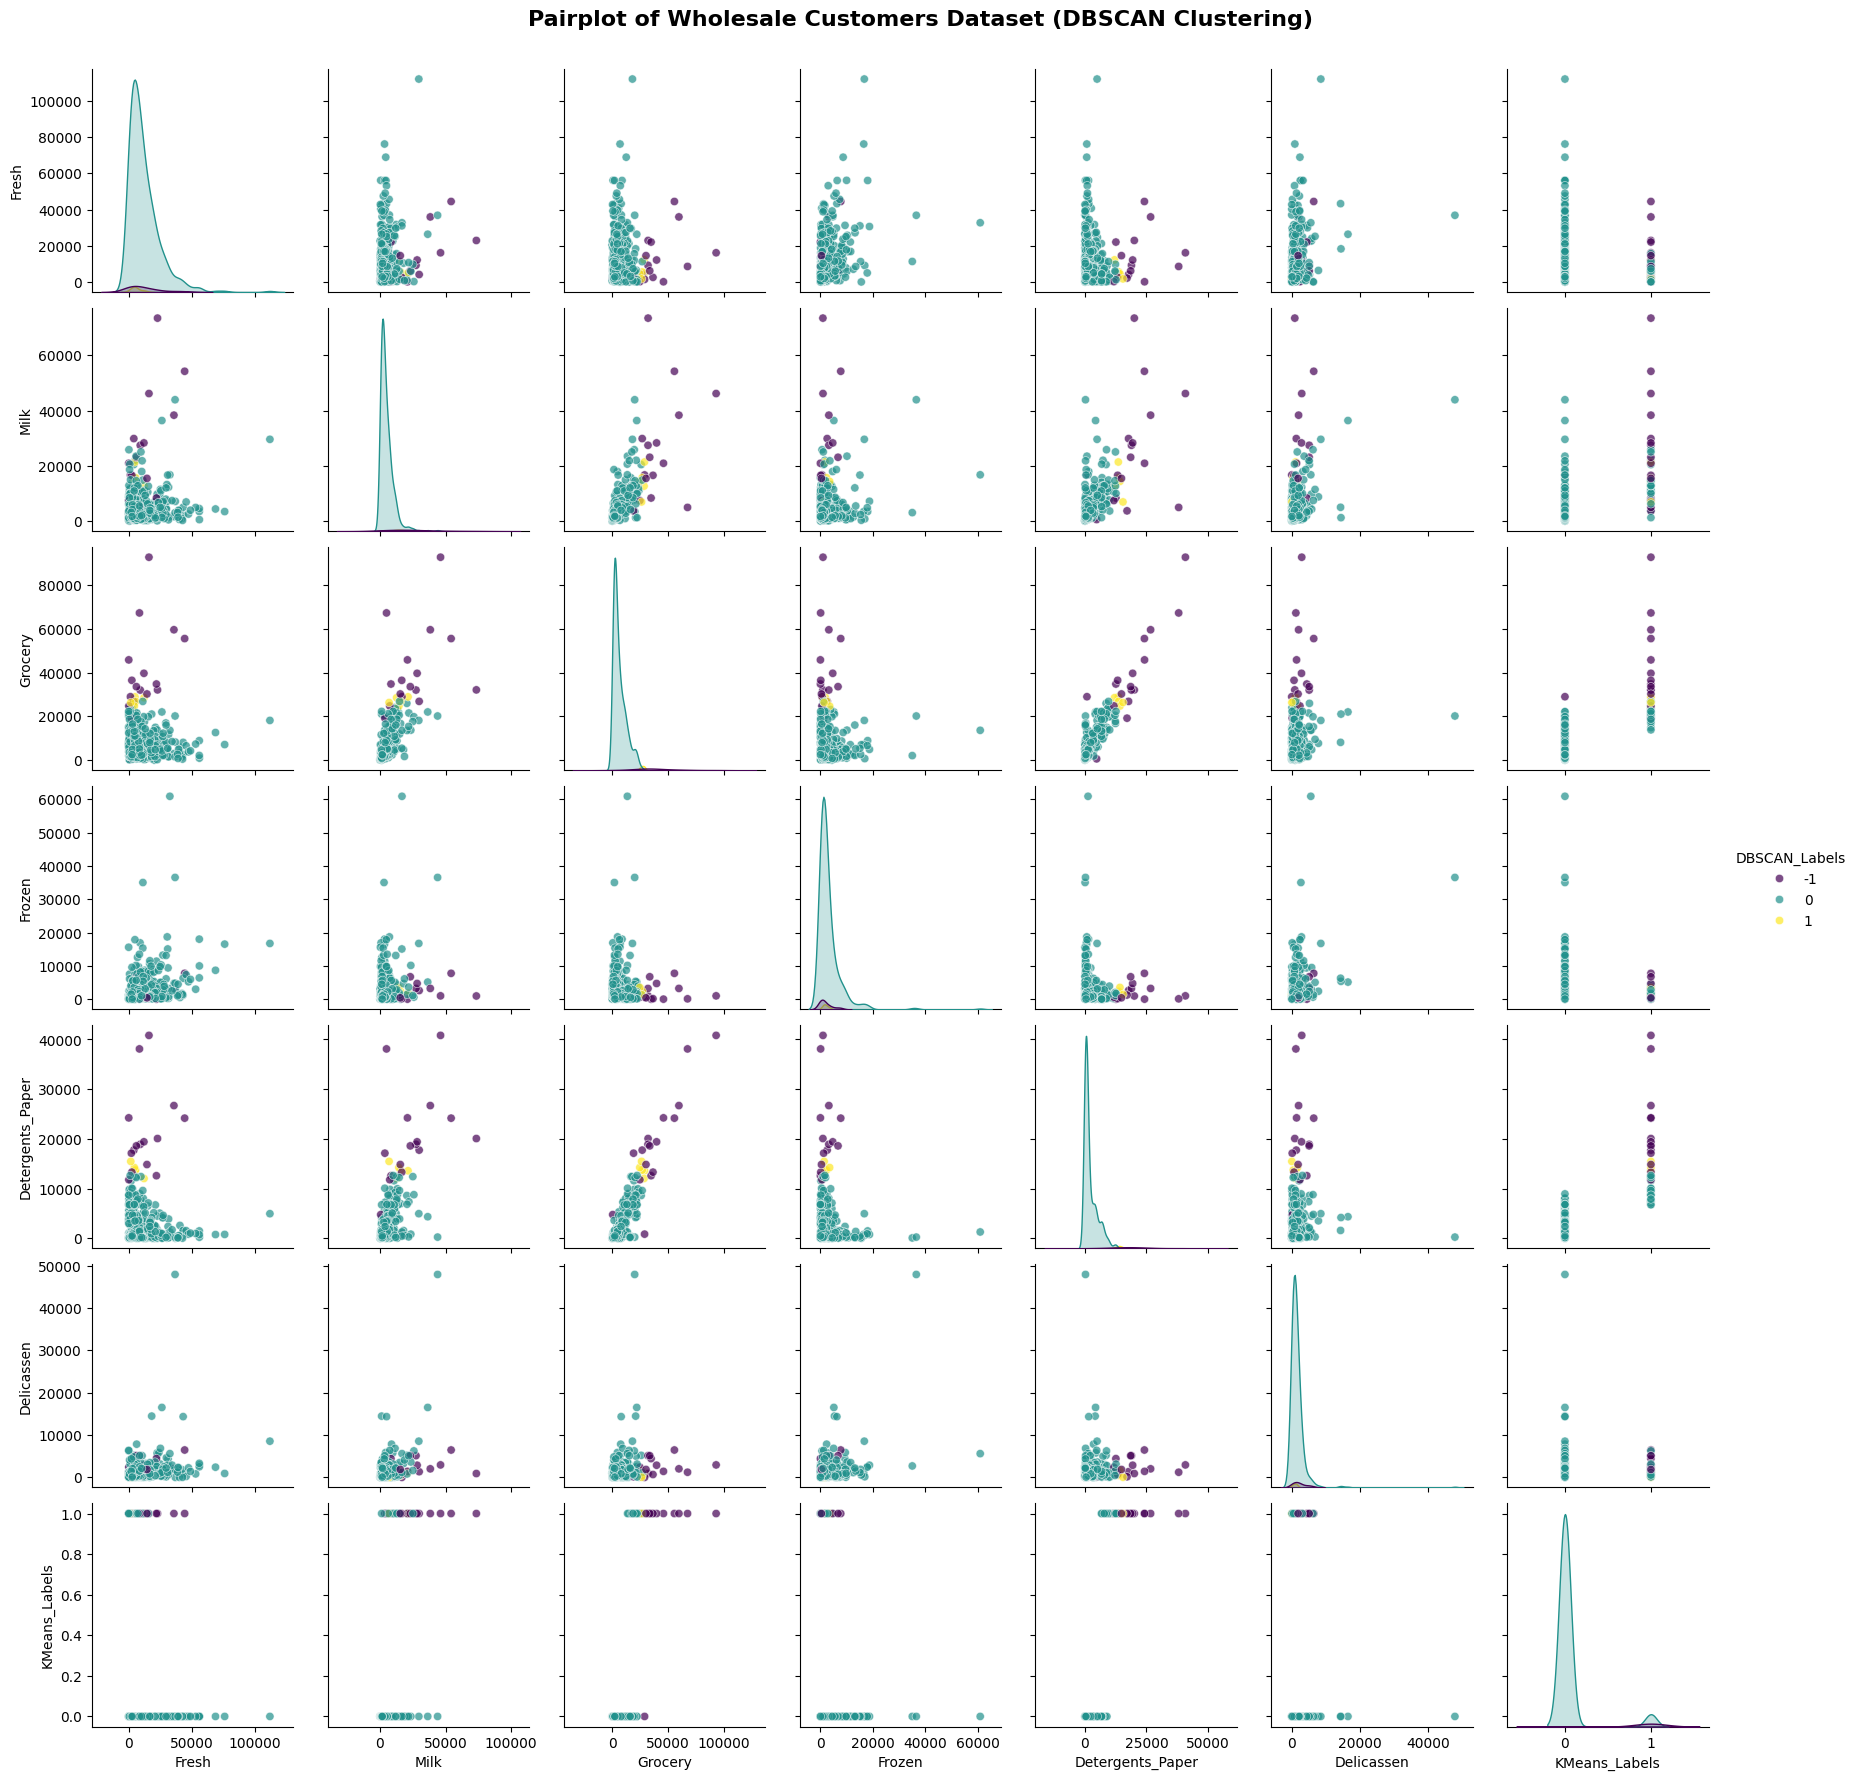

In [33]:
# Standardise the features for clustering (important for both K-Means and DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Grocery', 'Detergents_Paper']])

# K-Means Clustering
# Apply K-Means with 2 clusters (based on Silhouette Score)
kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering
# Apply DBSCAN with chosen eps=0.4 and min_samples=5 based on previous analysis
dbscan = DBSCAN(eps=0.4, min_samples=5)
df['DBSCAN_Labels'] = dbscan.fit_predict(X_scaled)

# Pairplot for both K-Means and DBSCAN

# Pairplot for K-Means Clustering
sns.pairplot(df, hue='KMeans_Labels', palette='viridis',
             plot_kws={'alpha': 0.7}, height=2.5)
plt.suptitle('Pairplot of Wholesale Customers Dataset (K-Means Clustering)',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Pairplot for DBSCAN Clustering
sns.pairplot(df, hue='DBSCAN_Labels', palette='viridis',
             plot_kws={'alpha': 0.7}, height=2.5)
plt.suptitle('Pairplot of Wholesale Customers Dataset (DBSCAN Clustering)',
             fontsize=16, fontweight='bold',y=1.02)
plt.show()


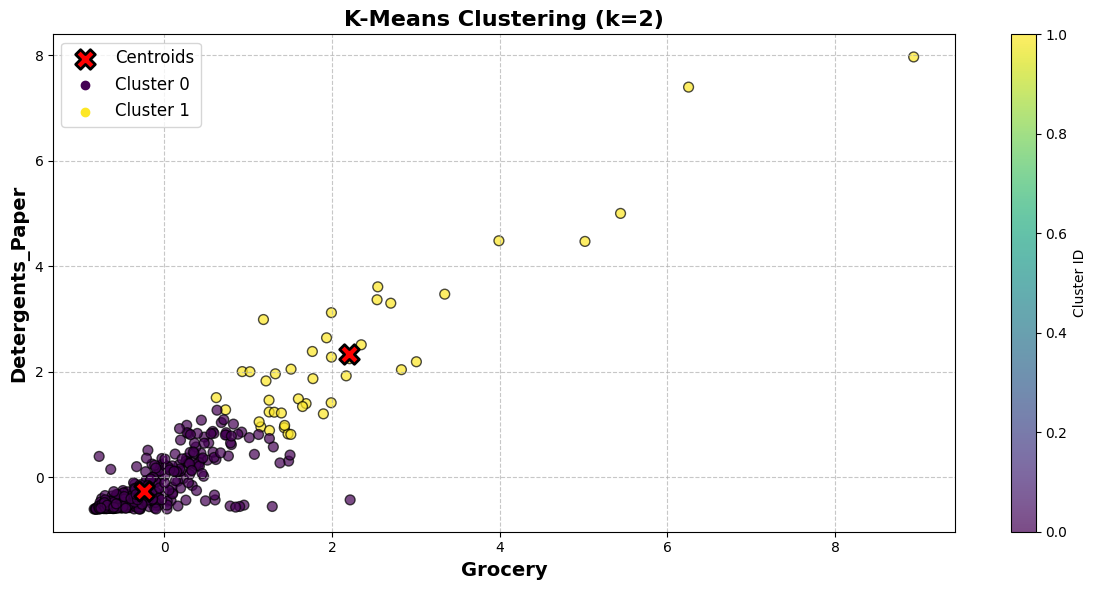

In [34]:
# Apply K-Means with 2 clusters (based on Silhouette Score)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plotting K-Means results
plt.figure(figsize=(12, 6))

# Create the scatter plot with colours corresponding to the cluster labels
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans,
                      cmap='viridis', alpha=0.7, edgecolors='k', s=50)

# Mark the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids', edgecolors='black',
            linewidths=2)

# Title and labels
plt.title('K-Means Clustering (k=2)', fontsize=16, fontweight='bold')
plt.xlabel('Grocery', fontsize=14, fontweight='bold')
plt.ylabel('Detergents_Paper',fontsize=14, fontweight='bold')

# Get the colourmap used by the scatter plot
cmap = scatter.get_cmap()

# Add a custom legend for each cluster using the normalised colormap
for i in range(2):
    # Normalise the cluster label to the colourmap range (0 to 1)
    color = cmap(i / (kmeans.n_clusters - 1))
    plt.scatter([], [], c=[color], label=f'Cluster {i}')

# Add the legend to the plot
plt.legend(fontsize=12)

# Display the colourbar
plt.colorbar(scatter, label='Cluster ID')

# Add grid and improve layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-35-51aa617672d6>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [],


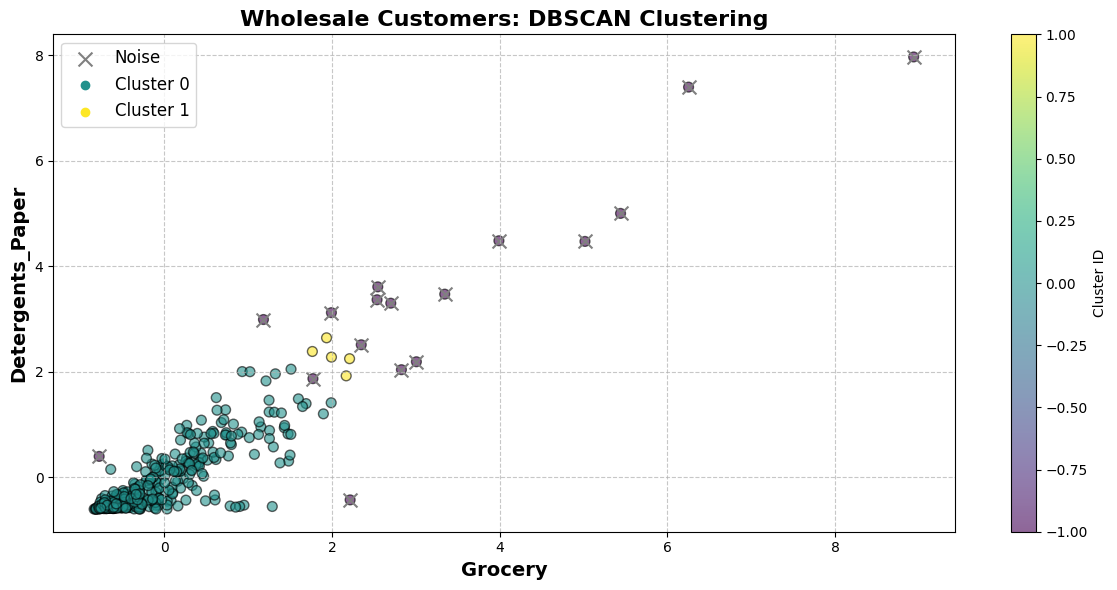

In [35]:
# DBSCAN Clustering

# Apply DBSCAN with chosen eps=0.4 and min_samples=5 based on previous analysis
dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualise DBSCAN clustering results
plt.figure(figsize=(12, 6))

# Scatter plot of the data points with cluster labels
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels,
                      cmap='viridis', alpha=0.6, edgecolors='k', s=50)

# Highlight noise points (dbscan labels == -1) in a different colour (gray)
plt.scatter(X_scaled[dbscan_labels == -1, 0], X_scaled[dbscan_labels == -1, 1],
            c='gray', marker='x', label='Noise', s=100)

# Add title and labels
plt.title('Wholesale Customers: DBSCAN Clustering', fontsize=16,
          fontweight='bold')
plt.xlabel('Grocery', fontsize=14, fontweight='bold')
plt.ylabel('Detergents_Paper', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Create a legend for clusters and noise
unique_labels = set(dbscan_labels)
for label in unique_labels:
    if label != -1:  # Don't include noise in the legend of clusters
        plt.scatter([], [],
                    c=plt.cm.viridis((label + 1) / (max(unique_labels) + 1)),
                    label=f'Cluster {label}')

# Add the legend to the plot
plt.legend(fontsize=12)

# Display the colourbar for better understanding of cluster-to-colour mapping
plt.colorbar(scatter, label='Cluster ID')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
# Check how many clusters and noise points are detected
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters detected: {n_clusters}")
print(f"Number of noise points detected: {n_noise}")


Number of clusters detected: 2
Number of noise points detected: 17


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import ipywidgets as widgets
from ipywidgets import interactive

# Function to plot DBSCAN results with interactive eps and min_samples
def plot_dbscan(eps, min_samples):
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)

    # Visualise DBSCAN clustering
    plt.figure(figsize=(12, 6))

    # Scatter plot of the data points with cluster labels
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                          c=dbscan_labels, cmap='viridis', alpha=0.6,
                          edgecolors='k', s=50)

    # Highlight noise points (dbscan labels == -1) in a different colour (gray)
    plt.scatter(X_scaled[dbscan_labels == -1, 0],
                X_scaled[dbscan_labels == -1, 1], c='gray', marker='x',
                label='Noise', s=100)

    # Add title and labels
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})',
              fontsize=16, fontweight='bold')
    plt.xlabel('Grocery', fontsize=14, fontweight='bold')
    plt.ylabel('Detergents_Paper', fontsize=14, fontweight='bold')

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    plt.legend(title="Clusters", fontsize=12)

    # Display the colourbar for better understanding of cluster-to-colour mapping
    plt.colorbar(scatter, label='Cluster ID')

    # Improve layout
    plt.tight_layout()
    plt.show()

# Create sliders for eps and min_samples
eps_slider = widgets.FloatSlider(value=0.4, min=0.1, max=1.0, step=0.1,
                                 description='Eps (eps):')
min_samples_slider = widgets.IntSlider(value=5, min=2, max=20, step=1,
                                       description='Min Samples:')

# Use interactive function to link the sliders to the plot
interactive_plot = interactive(plot_dbscan, eps=eps_slider,
                               min_samples=min_samples_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=0.4, description='Eps (eps):', max=1.0, min=0.1), IntSlider(value=5, d…

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interactive

# Function to plot K-Means results with interactive k (number of clusters)
def plot_kmeans(k):
    # Apply K-Means with the given number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)

    # Plot K-Means results
    plt.figure(figsize=(12, 6))

    # Scatter plot of the data points with cluster labels
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans,
                          cmap='viridis', alpha=0.6, edgecolors='k', s=50)

    # Mark the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X',
                label='Centroids')

    # Title and labels
    plt.title(f'K-Means Clustering (k={k})', fontsize=16, fontweight='bold')
    plt.xlabel('Grocery', fontsize=14, fontweight='bold')
    plt.ylabel('Detergents_Paper', fontsize=14, fontweight='bold')

    # Add a custom legend for each cluster using the same colourmap ('viridis')
    for i in range(k):  # Adjusted to dynamic k clusters
        plt.scatter([], [], color=plt.cm.viridis(i / k),
                    label=f'Cluster {i}')

    # Add the legend to the plot
    plt.legend(fontsize=12)

    # Display the colourbar for better understanding of cluster-to-colour mapping
    plt.colorbar(scatter, label='Cluster ID')

    # Add grid and improve layout
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Create slider for k (number of clusters)
k_slider = widgets.IntSlider(value=2, min=1, max=10, step=1,
                             description='Clusters (k):')

# Use interactive function to link the slider to the plot
interactive_plot_kmeans = interactive(plot_kmeans, k=k_slider)
display(interactive_plot_kmeans)


interactive(children=(IntSlider(value=2, description='Clusters (k):', max=10, min=1), Output()), _dom_classes=…